In [2]:
import pandas as pd
from pathlib import Path
import csv
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

In [3]:
awards_file = Path("/Users/sandysamy/Desktop/Projects/Project-1/sloucel_analysis/oscar.csv")

awards_df = pd.read_csv(awards_file)



movie_file = Path("/Users/sandysamy/Desktop/Projects/Project-1/jeff_analysis/final_df.csv")

cast_df = pd.read_csv(movie_file)

cast_df.columns

Index(['title', 'revenue', 'budget', 'genres', 'release_date',
       'Rotten Tomatoes Rating', 'Metascore', 'profit', 'Director', 'Actors',
       'main_genre_movie', 'side_genre_movie'],
      dtype='object')

In [4]:
cast_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,0.87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi"
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,0.73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi"
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,0.94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama"
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,0.82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy"
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,0.91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi"


In [6]:
cast_awards_df = pd.merge(cast_df, awards_df[['Film','Award', 'Nomination']], left_on='title', right_on='Film', how='left')
cast_awards_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,Film,Award,Nomination
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,0.87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",Inception,4.0,8.0
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,0.73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",Interstellar,1.0,5.0
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,0.94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",The Dark Knight,2.0,8.0
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,0.82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",Avatar,3.0,9.0
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,0.91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",NaN,NaN,NaN


In [7]:
lead_actor = cast_awards_df[['Lead actor', 'Cast']] = cast_awards_df['Actors'].str.split(',', n=1, expand=True)

lead_actor.head()

,0,1
0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page, Ken Watanabe"
1,Matthew McConaughey,"Anne Hathaway, Jessica Chastain, Mackenzie Foy"
2,Christian Bale,"Heath Ledger, Aaron Eckhart, Michael Caine"
3,Sam Worthington,"Zoe Saldana, Sigourney Weaver, Michelle Rodri..."
4,Robert Downey Jr.,"Chris Evans, Scarlett Johansson, Jeremy Renner"


In [9]:
cast_awards_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,Film,Award,Nomination,Lead actor,Cast
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,0.87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",Inception,4.0,8.0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page, Ken Watanabe"
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,0.73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",Interstellar,1.0,5.0,Matthew McConaughey,"Anne Hathaway, Jessica Chastain, Mackenzie Foy"
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,0.94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",The Dark Knight,2.0,8.0,Christian Bale,"Heath Ledger, Aaron Eckhart, Michael Caine"
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,0.82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",Avatar,3.0,9.0,Sam Worthington,"Zoe Saldana, Sigourney Weaver, Michelle Rodri..."
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,0.91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",NaN,NaN,NaN,Robert Downey Jr.,"Chris Evans, Scarlett Johansson, Jeremy Renner"


In [13]:

cast_awards_df['title'].nunique

<bound method IndexOpsMixin.nunique of 0                       Inception
1                    Interstellar
2                 The Dark Knight
3                          Avatar
4                    The Avengers
                  ...            
1561    Every Which Way but Loose
1562                       Colors
1563              Vanishing Point
1564           The Way of the Gun
1565                      Spartan
Name: title, Length: 1566, dtype: object>

In [14]:
cast_awards_df.drop(columns='Film', inplace=True)
cast_awards_df.head()

,title,revenue,budget,genres,release_date,Rotten Tomatoes Rating,Metascore,profit,Director,Actors,main_genre_movie,side_genre_movie,Award,Nomination,Lead actor,Cast
0,Inception,825532764,160000000,"Action, Science Fiction, Adventure",7/15/2010,0.87,74,665532764,Christopher Nolan,"Leonardo DiCaprio, Joseph Gordon-Levitt, Ellio...",Action,"Adventure, Sci-Fi",4.0,8.0,Leonardo DiCaprio,"Joseph Gordon-Levitt, Elliot Page, Ken Watanabe"
1,Interstellar,701729206,165000000,"Adventure, Drama, Science Fiction",11/5/2014,0.73,74,536729206,Christopher Nolan,"Matthew McConaughey, Anne Hathaway, Jessica Ch...",Adventure,"Drama, Sci-Fi",1.0,5.0,Matthew McConaughey,"Anne Hathaway, Jessica Chastain, Mackenzie Foy"
2,The Dark Knight,1004558444,185000000,"Drama, Action, Crime, Thriller",7/16/2008,0.94,84,819558444,Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart, M...",Action,"Crime, Drama",2.0,8.0,Christian Bale,"Heath Ledger, Aaron Eckhart, Michael Caine"
3,Avatar,2923706026,237000000,"Action, Adventure, Fantasy, Science Fiction",12/15/2009,0.82,83,2686706026,James Cameron,"Sam Worthington, Zoe Saldana, Sigourney Weaver...",Action,"Adventure, Fantasy",3.0,9.0,Sam Worthington,"Zoe Saldana, Sigourney Weaver, Michelle Rodri..."
4,The Avengers,1518815515,220000000,"Science Fiction, Action, Adventure",4/25/2012,0.91,69,1298815515,Joss Whedon,"Robert Downey Jr., Chris Evans, Scarlett Johan...",Action,"Adventure, Sci-Fi",NaN,NaN,Robert Downey Jr.,"Chris Evans, Scarlett Johansson, Jeremy Renner"


## Actors with the most amount of movies on this list:

In [15]:
number_of_unique_cast = len(pd.unique(cast_awards_df['Lead actor']))
number_of_unique_cast

601

In [16]:
actors_most_movies = cast_awards_df['Lead actor'].value_counts()

# top occuring actors

actors_most_movies.head()

Lead actor
Tom Cruise        23
Tom Hanks         22
Johnny Depp       21
Mel Gibson        18
Dwayne Johnson    18
Name: count, dtype: int64

In [17]:
# actors in the middle of the list

actors_most_movies.iloc[30:40]

Lead actor
Steve Carell        9
Kevin Costner       9
Sean Connery        9
Ben Affleck         9
Hugh Jackman        9
Patrick Stewart     9
Daniel Craig        9
Chris Hemsworth     8
Daniel Radcliffe    8
Chris Pratt         8
Name: count, dtype: int64

In [18]:
actors_most_movies.iloc[90:100]

Lead actor
Anna Faris          4
Patrick Wilson      4
Kevin Spacey        4
William Shatner     4
Simon Pegg          4
Angelina Jolie      4
Sigourney Weaver    4
Dustin Hoffman      4
Bill Murray         4
Jason Biggs         4
Name: count, dtype: int64

In [19]:
# bins with ranges

popularity_bins = pd.cut(actors_most_movies, [0, 5, 10, 15, 20, 25], labels=['0-5', '5-10', '10-15', '15-20', '20-25'])
popularity_bins

Lead actor
Tom Cruise        20-25
Tom Hanks         20-25
Johnny Depp       20-25
Mel Gibson        15-20
Dwayne Johnson    15-20
                  ...  
Elisabeth Moss      0-5
Wil Wheaton         0-5
Charlie Hunnam      0-5
Lewis Tan           0-5
Barry Newman        0-5
Name: count, Length: 601, dtype: category
Categories (5, object): ['0-5' < '5-10' < '10-15' < '15-20' < '20-25']

In [27]:
# box office mean per bin
# df_Paid.groupby('Charge Code')['days'].mean()
# Assuming 'cast_awards_df' contains the box office total and 'actors_df' is the DataFrame with lead actor counts and popularity bins
actors_df = pd.DataFrame({'Lead Actor Count': actors_most_movies, 'Popularity Bins': popularity_bins})

# Merge the 'cast_awards_df' with 'actors_df' on the lead actor column
merged_df = pd.merge(cast_awards_df, actors_df, left_on='Lead actor', right_index=True)

# Group the merged DataFrame by the 'Popularity Bins' and calculate the mean box office total for each bin
mean_box_office_per_bin = merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000

print(mean_box_office_per_bin)

Popularity Bins
0-5      159.917276
5-10     217.833479
10-15    185.906981
15-20    239.163521
20-25    277.952617
Name: profit, dtype: float64


/var/folders/jd/jl0dg_qj6xg4kq6zfpwmgt840000gn/T/ipykernel_2619/2910430147.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  mean_box_office_per_bin = merged_df.groupby('Popularity Bins')['profit'].mean()/1_000_000


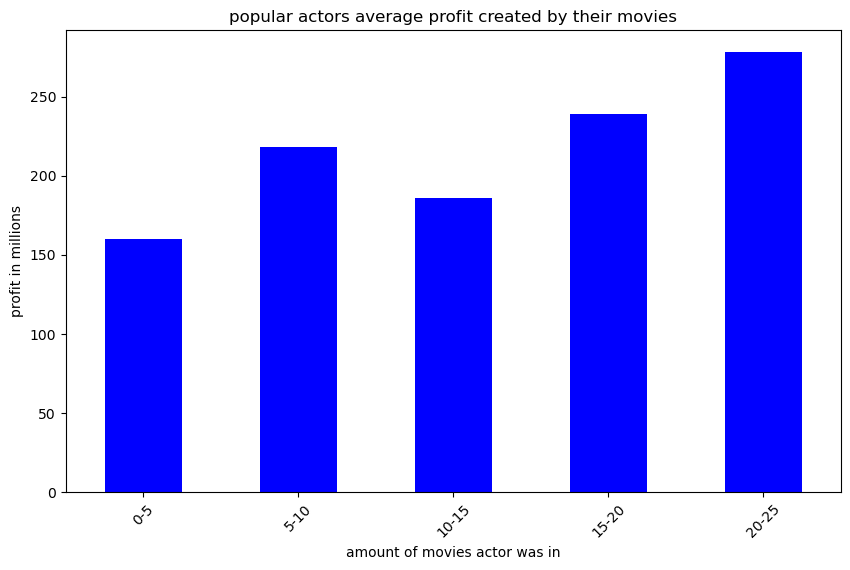

In [29]:
mean_box_office_per_bin.plot(kind='bar', figsize=(10, 6), color='blue')

# Titles and labels
plt.title('popular actors average profit created by their movies')
plt.xlabel('amount of movies actor was in')
plt.ylabel('profit in millions')
plt.xticks(rotation=45)  


plt.show()